# Filter based feature selection

**Goal:**
In this exercise, I will be doing practice to select best features for building data science model without affecting model performance.
For this I am using **human-activity-recognition-with-smartphones** data set. 

**Why feature selection is important?**
1. Reduce data sparsity 
2. Reduce compulational complexity

**Steps:**
1. As this data we have to predict Acitivity, which is a multi-class classification problem. I will be using RandomForect Classifier to check the model performance by using all the numerical features availble. As it is 
    1. robust to noisy data and missing values in features
    2. can handle imbalanced class distribution
    3. less prone to overfitting
2. Practice various filter based techiques for feature selection and check the performace impact of each techiques:
    1. Duplicate Features
    2. Variance threshold
    3. Correlation
    4. Anova
    5. Chi-square

**Credit:** 
This exercise is inspired by CampusX (https://www.youtube.com/watch?v=hRTe7tSkR2k)

In [40]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
df = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/test.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [43]:
# No missing values
df[df.isnull().any(axis=1)]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity


In [44]:
# Sample data: Features (X) and corresponding labels (y)
X= df.drop(columns=['Activity'], axis=1)
y=df['Activity']

# Replace X_train, X_test, y_train, y_test with your own data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Create a Random Forest Classifier model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
predictions = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9796610169491525


### Note
Great!! With RandomForestClassifier we are getting 97.96% accuracy. 
Not lets do feature selection and check the accuary of data with the RandomForestClassifier. 

# Duplicate Features

In [46]:
# Sample data: Features (X) and corresponding labels (y)
X= df.drop(columns=['Activity'], axis=1)
y= df['Activity']

# Replace X_train, X_test, y_train, y_test with your own data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(2357, 562) (590, 562)


In [47]:
# Drop duplicates : Method 1
def drop_duplicates(df):
    columns=df.columns
    dict={}
    for i in range(0,len(columns)):
        for j in range(i+1,len(columns)):
            if (df[columns[i]] == df[columns[j]]).all() == True:
                if not columns[i] in dict:
                    dict[columns[i]]=[]  
                dict[columns[i]].append(columns[j])   
    return dict

dup_columns=drop_duplicates(df)
dup_col_set = {*()}
for i in dup_columns.values():
    dup_col_set.update(i)
X_train.drop(columns=dup_col_set, inplace=True)
X_test.drop(columns=dup_col_set, inplace=True)
    
print(X_train.shape, X_test.shape)

(2357, 541) (590, 541)


In [48]:
# Drop duplicates : Method 2

# cols=df.T.duplicated()[(df.T.duplicated()==True)].index
# X_train.drop(columns=cols, inplace=True)
# X_test.drop(columns=cols, inplace=True)
# print(X_train.shape, X_test.shape)

## Variance Threshold Technique 

In Variance threshold tenchique, we filter out feature with variance ~=0. Intutuion is such feature won't help in predicting the output. So we can drop such features.

Before applying VarianceThreshold, make sure that data is normalizes so that single threshold works for all the features. Right now our data is already normalized.

Threshold between 0.01-0.1 is consider good for feature selection.


In [49]:
from sklearn.feature_selection import VarianceThreshold

vt= VarianceThreshold(threshold=0.05)
vt.fit(X_train)
sum(vt.get_support())

330

In [50]:
columns=X_train.columns[vt.get_support()]

X_train=vt.transform(X_train)
X_test=vt.transform(X_test)

X_train=pd.DataFrame(X_train, columns=columns)
X_test=pd.DataFrame(X_test, columns=columns)

print(X_train.shape, X_test.shape)

(2357, 330) (590, 330)


### Challenges 
With **Variance Threshold technique**:
1. Sensitivity to Feature Scale
2. Doesn't Consider Relationships between features and also with target 
3. Limited to Numeric Features
4. Unsuitable for Sparse Data
5. Arbitrary Threshold Selection

## Correlation Technique

In [30]:
import seaborn as sns

<Axes: >

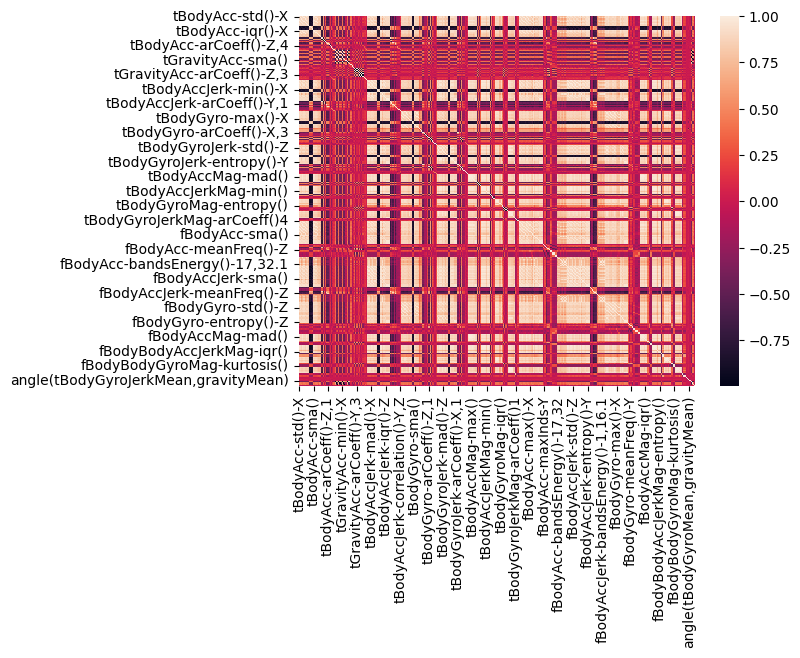

In [32]:
# sns.heatmap(X_train.corr())

In [54]:
corr_matrix=X_train.corr()

columns=X_train.columns
cols_to_drop=set()
for i in range(0,len(columns)):
    for j in range(i+1,len(columns)):
        if abs(corr_matrix.loc[columns[i],columns[j]])>0.95:
            cols_to_drop.add(columns[j])
print(len(cols_to_drop))

193


In [55]:
X_train.drop(columns=cols_to_drop, inplace=True, axis=1)
X_test.drop(columns=cols_to_drop, inplace=True, axis=1)
print(X_train.shape, X_test.shape)

(2357, 137) (590, 137)


### Challenge:
With Correlation Technique:
1. Consider only linear relationship
2. Sensivity to outliers
3. Multicollinearity : out of highly correlated feature selecting the most relvant one.